# Proyecto: Análisis de Churn de Clientes
Autor: Miguel Vásquez  
Fecha: Agosto 2025  

# 1. Introducción

En el presete proyecto se tiene como base el porcentaje de clientes que terminar su afilición con una empresa, a esto se le llama churn.
Esto con el fin de poder identificarlos de manera más rápida y eficiente antes de que termine su contrato y poder aplicar estrategias de retención de los mismos.
en este proyecto buscaremos: 

- ¿Identificar el porcentaje de clientes que finalizan sus servicios y el que se queda?
- ¿El porcentaje de chrun varía según el servicio contratado?
- Servicios más rentables

# 2. Importe de bibliotecas

In [1]:
# Data handling
import pandas as pd
import numpy as np
import missingno as msno

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Utilities
import warnings
from IPython.display import display

warnings.filterwarnings("ignore")

# Configuración global de visualizaciones
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
import kagglehub
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
#Cargado dataset
csv_file_path = path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(csv_file_path)
#primeras 5 columnas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Análisamos los datos
Con este primer paso podemos observar un preview de la data que tenemos.
Las que más interesan según nuestro proyecto:
- Churn -> Columna que nos indica si el cliente terminó su contrato el último mes
- Servicios -> Varias columnas en las que podemos observar que servicios contrata el cliente
- Tipo de contrato -> Cuando renueva, forma de pago, tiempo que ha contratado el servicio, pago mendual y pago acumulado
- Información sobre el cliente -> Género, edad, pareja y dependientes

In [3]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Nombre de las columnas
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
#Tipo de valores de cada columna
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

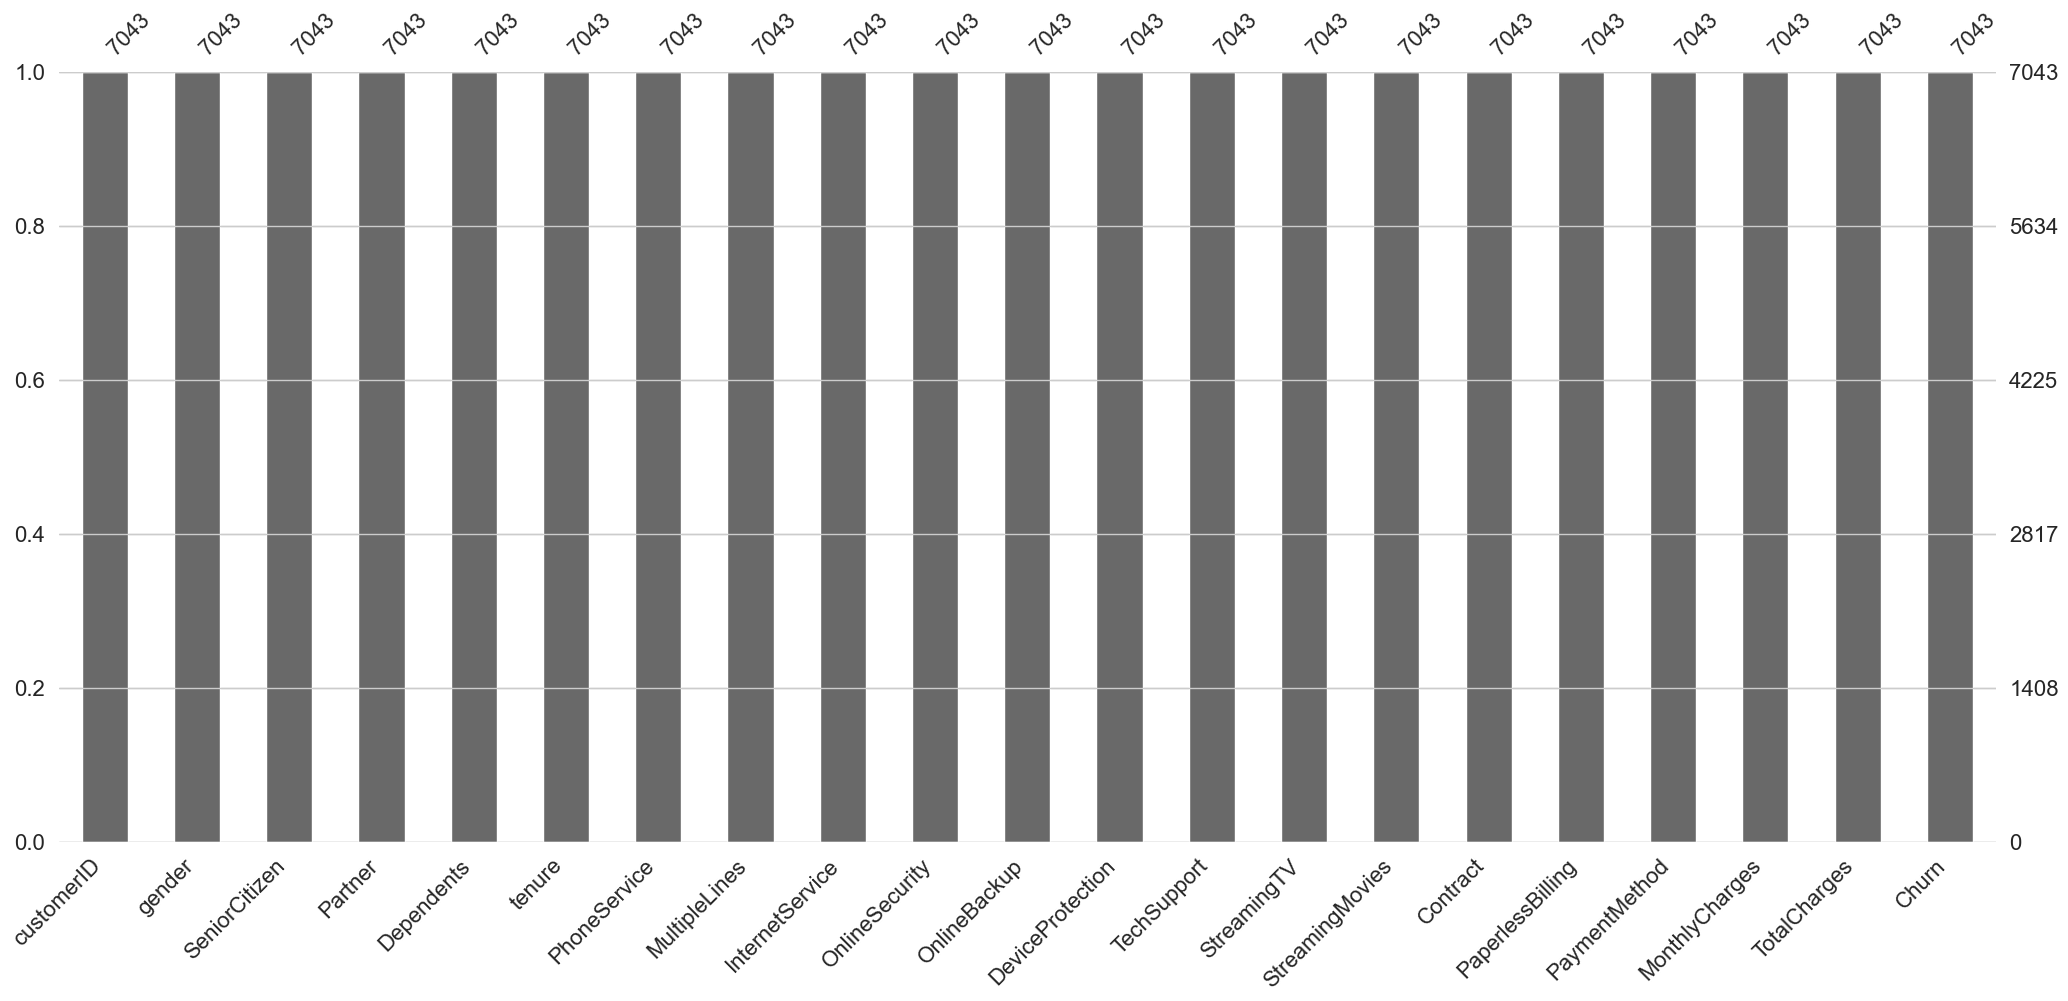

In [6]:
#Visualizamos la data para encontrar valores faltantes
msno.bar(df);

# 4. Manipulación de datos

In [7]:
#Empezamos con la limpieza de datos, primero el customerID no nos sirve para un análisis además que ya tenemos un índice
df = df.drop(columns=['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Antes vimos que no existía ningún valor faltante, pero hemos observado que la columna 'TotalCharges' es tipo Object, por lo que procederemos a convertirla a numérica. Esto permitirá que de existir valores " " sean tratados como "NaN".

In [8]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Podemos observar que efectivamente, " " no era detectado como valor falante, pero ahora sí, lo cual ayudará con nuestro análisis.

In [9]:
# Filas con valores nulos en 'TotalCharges'
df[df['TotalCharges'].isna()].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [10]:
#Eliminamos filas con valores nulos en 'TotalCharges'
df = df[~df["TotalCharges"].isna()]
#Como hemos modificado el DataFrame, es recomendable reiniciar el índice
df.reset_index(drop=True, inplace=True)

Si somos observadores podemos ver que la mayoría de columnas binarias (que solo tienen 2 valores) son "si" o "no", la única que difiera es SeniorCitizen, así que homologamos con las demás para su fácil uso más adelante

In [11]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
print("📊 Churn rate")
print("=" * 50)
print(f"• Total customers analyzed: {len(df):,}")
print(f"• Overall churn rate: {(df['Churn'] == 'Yes').mean()*100:.1f}%")

📊 Churn rate
• Total customers analyzed: 7,032
• Overall churn rate: 26.6%


# 5. Visualización de datos

In [13]:
def plot_donut_subplots(data_list, rows=1, cols=2, title=None, subplot_titles=None, text_size=16):
    fig = make_subplots(
        rows=rows, cols=cols,
        specs=[[{"type": "domain"} for _ in range(cols)] for _ in range(rows)],
        subplot_titles=subplot_titles
    )
    
    for i, data in enumerate(data_list):
        row = i // cols + 1
        col = i % cols + 1

        fig.add_trace(go.Pie(
            labels=data["labels"],
            values=data["values"],
            hole=0.4,
            marker_colors=data["colors"],
            textinfo="percent",
            textposition="inside",
            insidetextorientation="radial",
            textfont=dict(size=text_size),
            name=data.get("name", f"trace_{i}"),
            showlegend=True,
            legendgroup=f"group_{i}"
        ), row, col)

    fig.update_layout(
        title_text=title,
        title_x=0.5,
        title_font_size=18,
        font=dict(size=12),
        legend=dict(
            orientation="v",
            x=1.05, y=1
        )
    )
    return fig


In [14]:
# Haremos nuestro primer diagrama para ver la distribución de churn por género
# Etiquetas
g_labels = df['gender'].value_counts().index
c_labels = df['Churn'].value_counts().index

plot_donut_subplots(
    data_list=[
        {
            "labels": g_labels,
            "values": df['gender'].value_counts(),
            "name": "Gender",
            "colors": ['#636EFA', '#EF553B'],
        },
        {
            "labels": c_labels,
            "values": df['Churn'].value_counts(),
            "name": "Churn",
            "colors": ['#00CC96', '#AB63FA'],
        }
    ],
    rows=1, cols=2,
    title="<b>Gender and Churn Distributions</b>",
    subplot_titles=["<b>Gender</b>", "<b>Churned customers</b>"],
    text_size=18
)



In [15]:
#Tomando esto como base, vamos a observar si la misma distribución se mantiene al momento de abandono
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

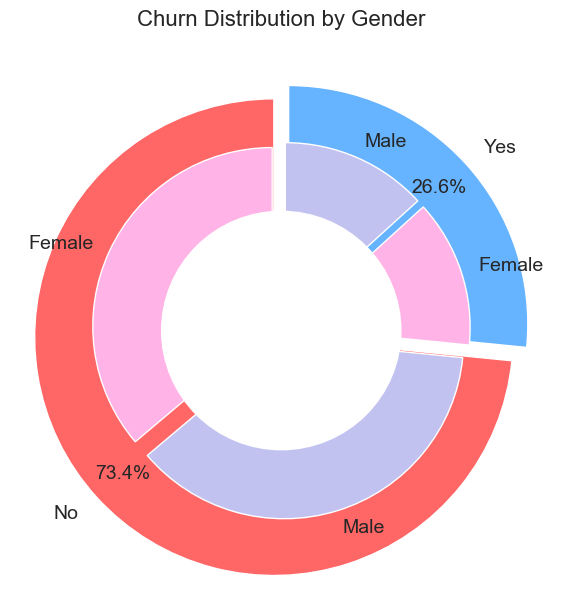

In [16]:
#Visto que hemos visto que la correlación se mantiene, haremos un gráfico para poder visualizarlo
# Crear tabla de conteos
churn_gender_counts = df.groupby(["Churn", "gender"]).size()

# Totales de churn
churn_totals = df["Churn"].value_counts()

# Labels
labels = churn_totals.index
values = churn_totals.values

# Labels y valores por género
labels_gender = churn_gender_counts.index.get_level_values(1)
sizes_gender = churn_gender_counts.values

# Colores
colors = ['#ff6666', '#66b3ff']  # Churn Yes / No
colors_gender = ['#ffb3e6', '#c2c2f0', '#ffb3e6', '#c2c2f0']

# Gráfico
plt.figure(figsize=(7, 7))
textprops = {"fontsize":14}

# Donut externo (churn Yes/No)
plt.pie(
    values, labels=labels, autopct='%1.1f%%',
    pctdistance=0.85, colors=colors, startangle=90,
    explode=(0.05,0.05), radius=1.2, textprops=textprops
)

# Donut interno (género dentro de cada churn)
plt.pie(
    sizes_gender, labels=labels_gender, colors=colors_gender,
    startangle=90, radius=0.9, explode=[0.05]*len(sizes_gender),
    textprops=textprops
)

# Círculo blanco al centro
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título
plt.title("Churn Distribution by Gender", fontsize=16, y=1.05)
plt.axis('equal')
plt.show()


In [17]:
# Estadísticas generales
overall_churn_rate = (df['Churn'] == 'Yes').mean() * 100

churn_by_gender = df.groupby('gender').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'gender': 'count'
}).round(2)
churn_by_gender.columns = ['Churn_Rate', 'Total_Customers']
churn_by_gender = churn_by_gender.reset_index().sort_values('Churn_Rate', ascending=True)


print(f"\n💳 GENDER ANALYSIS:")
for _, row in churn_by_gender.iterrows():
    method = row['gender']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])
    
    # Determinar si está por encima o debajo del promedio
    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"
    
    print(f"  • {method}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()


💳 GENDER ANALYSIS:
  • Male:
    - Churn rate: 26.2% (🟢 LOW)
    - Total customers: 3,549
    - Difference vs average: -0.4%

  • Female:
    - Churn rate: 27.0% (🔴 HIGH)
    - Total customers: 3,483
    - Difference vs average: +0.4%



In [18]:
def plot_histogram(df, x, color=None, barmode="group", title="", histnorm="percent"):
    fig = px.histogram(
        df, x=x, color=color, barmode=barmode, histnorm=histnorm,
        title=f"<b>{title}</b>"
    )
    
    fig.update_layout(
        width=800, height=550,
        bargap=0.15,
        xaxis_title=f"<b>{x}</b>",
        yaxis_title="<b>Percent</b>" if histnorm=="percent" else "<b>Count</b>",
        title_x=0.5, title_font_size=16,
        font=dict(size=12),
        plot_bgcolor="white", paper_bgcolor="white",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    
    fig.update_traces(
        texttemplate="%{y:.1f}" + ("%" if histnorm=="percent" else ""),
        textposition="outside",
        marker_line_width=1.5, marker_line_color="white", opacity=0.8
    )
    
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor="lightgray",
                     tickfont=dict(size=12, color="black"))
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor="lightgray",
                     tickfont=dict(size=12, color="black"))
    
    fig.show()

In [19]:
#Ahora veremos la distribución de churn por género
plot_histogram(df, x="Churn", color="Contract",
               title="<b>Distribution of Contract Types by Churn Status</b>")


In [20]:
# Calculamos la tasa de churn por tipo de contrato
churn_rate = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
churn_rate.columns = ['Contract', 'Churn_Rate']
churn_rate = churn_rate.sort_values('Churn_Rate', ascending=True)

fig = px.bar(churn_rate, x='Churn_Rate', y='Contract', 
              title="<b>Churn Rate by Contract Type</b>",
              orientation='h',
              color='Churn_Rate',
              color_continuous_scale='RdYlGn_r',
              text='Churn_Rate')

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

fig.update_layout(
    width=800,
    height=400,
    xaxis_title="<b>Churn Rate (%)</b>",
    yaxis_title="<b>Contract Type</b>",
    title_x=0.5,
    title_font_size=16,
    font=dict(size=12),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    xaxis=dict(range=[0, max(churn_rate['Churn_Rate']) * 1.1])
)

fig.show()


In [21]:
print("\n🔍 CHURN RATE PER CONTRACT:")
churn_by_contract = df.groupby('Contract').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'Contract': 'count'
}).round(2)
churn_by_contract.columns = ['Churn_Rate', 'Total_Customers']
churn_by_contract = churn_by_contract.reset_index().sort_values('Churn_Rate', ascending=True)

for _, row in churn_by_contract.iterrows():
    contract = row['Contract']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])

    # Determinar si está por encima o debajo del promedio
    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"
    print(f"  • {contract}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

print(f"\n💡 RECOMMENDATIONS FOR CONTRACT:")
print("  • Focus on retaining customers with high churn contracts")
print("  • Analyze benefits of promoting long-term contracts")
print("  • Investigate specific factors leading to churn in each type")


🔍 CHURN RATE PER CONTRACT:
  • Two year:
    - Churn rate: 2.9% (🟢 LOW)
    - Total customers: 1,685
    - Difference vs average: -23.7%

  • One year:
    - Churn rate: 11.3% (🟢 LOW)
    - Total customers: 1,472
    - Difference vs average: -15.3%

  • Month-to-month:
    - Churn rate: 42.7% (🔴 HIGH)
    - Total customers: 3,875
    - Difference vs average: +16.1%


💡 RECOMMENDATIONS FOR CONTRACT:
  • Focus on retaining customers with high churn contracts
  • Analyze benefits of promoting long-term contracts
  • Investigate specific factors leading to churn in each type


In [22]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values, 
    hole=.4,
    textinfo="percent",
    textposition="inside",
    insidetextorientation="horizontal",
    textfont=dict(size=20),
    marker_colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
)])

fig.update_layout(
    title_text="<b>General Distribution of Payment Methods</b>",
    title_x=0.5,
    title_font_size=18,
    width=700,
    height=500,
    font=dict(size=12),
    legend=dict(
        orientation="v",
        x=1.05, y=1
    )
)

fig.show()

In [23]:
# Haremos nuestro primer diagrama para ver la distribución de churn por método de pago
# Etiquetas
retained_payments = df[df['Churn'] == 'No']['PaymentMethod'].value_counts()
rotated_payments = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()

plot_donut_subplots(
    data_list=[
        {
            "labels": retained_payments.index,
            "values": retained_payments.values,
            "name": "Retained",
            "colors": ['#636EFA', '#EF553B', '#FFA15A', '#19D3F3'],
            "annotation": "Payment Method"
        },
        {
            "labels": rotated_payments.index,
            "values": rotated_payments.values,
            "name": "Churned",
            "colors": ['#00CC96', '#AB63FA', '#FF6692', '#B6E880'],
            "annotation": "Churned"
        }
    ],
    rows=1, cols=2,
    title="<b>Payment Method Distributions</b>",
    subplot_titles=["<b>Retained customers</b>", "<b>Churned customers</b>"],
    text_size=18
)


In [24]:
churn_by_payment = df.groupby('PaymentMethod').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'PaymentMethod': 'count'
}).round(2)
churn_by_payment.columns = ['Churn_Rate', 'Total_Customers']
churn_by_payment = churn_by_payment.reset_index().sort_values('Churn_Rate', ascending=True)

print(f"\n💳 ANALYSIS BY PAYMENT METHOD:")
for _, row in churn_by_payment.iterrows():
    method = row['PaymentMethod']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])
    
    # Determinar si está por encima o debajo del promedio
    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"

    print(f"  • {method}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

    # Identificar método más y menos riesgoso
highest_churn = churn_by_payment.iloc[-1]
lowest_churn = churn_by_payment.iloc[0]

print(f"🎯 KEY INSIGHTS:")
print(f"  • HIGHEST RISK: {highest_churn['PaymentMethod']} ({highest_churn['Churn_Rate']:.1f}%)")
print(f"  • LOWEST RISK: {lowest_churn['PaymentMethod']} ({lowest_churn['Churn_Rate']:.1f}%)")
print(f"  • DIFFERENCE: {highest_churn['Churn_Rate'] - lowest_churn['Churn_Rate']:.1f} percentage points")

print(f"\n💡 RECOMMENDATIONS FOR PAYMENT METHOD:")
print(f"  • Encourage the use of {lowest_churn['PaymentMethod']}")
print(f"  • Investigate issues with {highest_churn['PaymentMethod']}")
print(f"  • Consider specific retention programs by payment method")
print(f"  • Analyze the ease of use and experience of each method")


💳 ANALYSIS BY PAYMENT METHOD:
  • Credit card (automatic):
    - Churn rate: 15.2% (🟢 LOW)
    - Total customers: 1,521
    - Difference vs average: -11.3%

  • Bank transfer (automatic):
    - Churn rate: 16.7% (🟢 LOW)
    - Total customers: 1,542
    - Difference vs average: -9.8%

  • Mailed check:
    - Churn rate: 19.2% (🟢 LOW)
    - Total customers: 1,604
    - Difference vs average: -7.4%

  • Electronic check:
    - Churn rate: 45.3% (🔴 HIGH)
    - Total customers: 2,365
    - Difference vs average: +18.7%

🎯 KEY INSIGHTS:
  • HIGHEST RISK: Electronic check (45.3%)
  • LOWEST RISK: Credit card (automatic) (15.2%)
  • DIFFERENCE: 30.0 percentage points

💡 RECOMMENDATIONS FOR PAYMENT METHOD:
  • Encourage the use of Credit card (automatic)
  • Investigate issues with Electronic check
  • Consider specific retention programs by payment method
  • Analyze the ease of use and experience of each method


In [25]:
pastel_palette = px.colors.qualitative.Set3
df_counts = df.groupby(['Churn', 'gender', 'InternetService']).size().reset_index(name='Count')
colors = {'DSL':pastel_palette[4], 'Fiber optic':pastel_palette[3], 'No':pastel_palette[0]}
service_labels = {
    'DSL': 'DSL',
    'Fiber': 'Fiber optic',
    'No': 'No Internet'
}
# Preparar la figura
fig = go.Figure()

for service, group in df_counts.groupby('InternetService'):
    fig.add_trace(go.Bar(
        x=[group['Churn'], group['gender']],  # jerarquía X: Churn -> Gender
        y=group['Count'],
        name=service_labels.get(service, service),
        marker_color=colors.get(service, '#000000')  # color por defecto negro
    ))

fig.update_layout(
    title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>",
    title_x=0.5,
    barmode='group'
)

fig.show()

In [26]:
# Agrupamos por 3 variables
churn_by_group = df.groupby(['gender', 'InternetService']).agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'PaymentMethod': 'count'
}).round(2)

churn_by_group.columns = ['Churn_Rate', 'Total_Customers']
churn_by_group = churn_by_group.reset_index().sort_values('Churn_Rate', ascending=True)

print(f"\n💳 ANALYSIS BY GENDER & INTERNET SERVICE:")

for _, row in churn_by_group.iterrows():
    gender = row['gender']
    service = row['InternetService']
    rate = row['Churn_Rate']

    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"

    print(f"  • {gender} | {service}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {row['Total_Customers']:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

# Identificar combinaciones más y menos riesgosas
highest_churn = churn_by_group.iloc[-1]
lowest_churn = churn_by_group.iloc[0]

print(f"🎯 KEY INSIGHTS:")
print(f"  • HIGHEST RISK: {highest_churn['gender']} | {highest_churn['InternetService']} | ({highest_churn['Churn_Rate']:.1f}%)")
print(f"  • LOWEST RISK: {lowest_churn['gender']} | {lowest_churn['InternetService']} | ({lowest_churn['Churn_Rate']:.1f}%)")
print(f"  • DIFFERENCE: {highest_churn['Churn_Rate'] - lowest_churn['Churn_Rate']:.1f} percentage points")

print(f"\n💡 RECOMMENDATIONS FOR GENDER & INTERNET SERVICE:")
print(f"  • Encourage retention for {lowest_churn['gender']} customers on {lowest_churn['InternetService']} (Churn Rate: {lowest_churn['Churn_Rate']:.1f}%)")
print(f"  • HIGHEST RISK: {highest_churn['gender']} | {highest_churn['InternetService']} (Churn Rate: {highest_churn['Churn_Rate']:.1f}%)")



💳 ANALYSIS BY GENDER & INTERNET SERVICE:
  • Male | No:
    - Churn rate: 7.4% (🟢 LOW)
    - Total customers: 774
    - Difference vs average: -19.2%

  • Female | No:
    - Churn rate: 7.5% (🟢 LOW)
    - Total customers: 746
    - Difference vs average: -19.1%

  • Female | DSL:
    - Churn rate: 18.5% (🟢 LOW)
    - Total customers: 1,184
    - Difference vs average: -8.1%

  • Male | DSL:
    - Churn rate: 19.5% (🟢 LOW)
    - Total customers: 1,232
    - Difference vs average: -7.1%

  • Male | Fiber optic:
    - Churn rate: 41.0% (🔴 HIGH)
    - Total customers: 1,543
    - Difference vs average: +14.4%

  • Female | Fiber optic:
    - Churn rate: 42.8% (🔴 HIGH)
    - Total customers: 1,553
    - Difference vs average: +16.2%

🎯 KEY INSIGHTS:
  • HIGHEST RISK: Female | Fiber optic | (42.8%)
  • LOWEST RISK: Male | No | (7.4%)
  • DIFFERENCE: 35.4 percentage points

💡 RECOMMENDATIONS FOR GENDER & INTERNET SERVICE:
  • Encourage retention for Male customers on No (Churn Rate: 7.4%)
  

In [27]:
#Ahora veremos la distribución de churn por dependientes
plot_histogram(df, x="Churn", color="Dependents",
               title="<b>Distribution of Dependents Types by Churn Status</b>")

In [28]:
# 🔍 CHURN RATE PER DEPENDENTS
churn_by_dependents = df.groupby('Dependents').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'Dependents': 'count'
}).round(2)

churn_by_dependents.columns = ['Churn_Rate', 'Total_Customers']
churn_by_dependents = churn_by_dependents.reset_index().sort_values('Churn_Rate', ascending=True)

print("\n🔍 CHURN RATE PER DEPENDENTS:")

for _, row in churn_by_dependents.iterrows():
    dependents = row['Dependents']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])

    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"
    print(f"  • {dependents}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

# Identificar grupos de alto y bajo riesgo
high_risk = churn_by_dependents[churn_by_dependents['Churn_Rate'] > overall_churn_rate]['Dependents'].tolist()
low_risk = churn_by_dependents[churn_by_dependents['Churn_Rate'] <= overall_churn_rate]['Dependents'].tolist()

print(f"\n💡 RECOMMENDATIONS FOR DEPENDENTS:")
if high_risk:
    print(f"  • Focus on retaining customers in high-risk groups: {', '.join(high_risk)} in Dependents")
if low_risk:
    print(f"  • Leverage strategies from low-risk groups: {', '.join(low_risk)} in Dependents")



🔍 CHURN RATE PER DEPENDENTS:
  • Yes:
    - Churn rate: 15.5% (🟢 LOW)
    - Total customers: 2,099
    - Difference vs average: -11.0%

  • No:
    - Churn rate: 31.3% (🔴 HIGH)
    - Total customers: 4,933
    - Difference vs average: +4.7%


💡 RECOMMENDATIONS FOR DEPENDENTS:
  • Focus on retaining customers in high-risk groups: No in Dependents
  • Leverage strategies from low-risk groups: Yes in Dependents


In [29]:
#Ahora veremos la distribución de churn por dependientes
plot_histogram(df, x="Churn", color="Partner",
               title="<b>Distribution of Partner Types by Churn Status</b>")

In [30]:
# 🔍 PARTNER RATE PER PARTNER
churn_by_partner = df.groupby('Partner').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'Partner': 'count'
}).round(2)

churn_by_partner.columns = ['Churn_Rate', 'Total_Customers']
churn_by_partner = churn_by_partner.reset_index().sort_values('Churn_Rate', ascending=True)

print("\n🔍 CHURN RATE PER PARTNER:")

for _, row in churn_by_partner.iterrows():
    partner = row['Partner']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])

    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"
    print(f"  • {partner}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

# Identificar grupos de alto y bajo riesgo
high_risk = churn_by_partner[churn_by_partner['Churn_Rate'] > overall_churn_rate]['Partner'].tolist()
low_risk = churn_by_partner[churn_by_partner['Churn_Rate'] <= overall_churn_rate]['Partner'].tolist()

print(f"\n💡 RECOMMENDATIONS FOR PARTNER:")
if high_risk:
    print(f"  • Offer loyalty rewards or targeted incentives for high-risk groups: {', '.join(map(str, high_risk))}")
if low_risk:
    print(f"  • Learn from low-risk groups ({', '.join(map(str, low_risk))}) to design broader retention strategies")


🔍 CHURN RATE PER PARTNER:
  • Yes:
    - Churn rate: 19.7% (🟢 LOW)
    - Total customers: 3,393
    - Difference vs average: -6.9%

  • No:
    - Churn rate: 33.0% (🔴 HIGH)
    - Total customers: 3,639
    - Difference vs average: +6.4%


💡 RECOMMENDATIONS FOR PARTNER:
  • Offer loyalty rewards or targeted incentives for high-risk groups: No
  • Learn from low-risk groups (Yes) to design broader retention strategies


In [31]:
#Ahora veremos la distribución de churn según si es ciudadano senior
plot_histogram(df, x="Churn", color="SeniorCitizen",
               title="<b>Distribution of Senior Citizens by Churn Status</b>")

In [32]:
# 🔍 PARTNER RATE PER PARTNER
churn_by_seniorC = df.groupby('SeniorCitizen').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'SeniorCitizen': 'count'
}).round(2)

churn_by_seniorC.columns = ['Churn_Rate', 'Total_Customers']
churn_by_seniorC = churn_by_seniorC.reset_index().sort_values('Churn_Rate', ascending=True)

print("\n🔍 CHURN RATE PER SENIOR CITIZEN:")

for _, row in churn_by_seniorC.iterrows():
    senior = row['SeniorCitizen']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])

    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"
    print(f"  • {senior}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

# Identificar grupos de alto y bajo riesgo
high_risk = churn_by_seniorC[churn_by_seniorC['Churn_Rate'] > overall_churn_rate]['SeniorCitizen'].tolist()
low_risk = churn_by_seniorC[churn_by_seniorC['Churn_Rate'] <= overall_churn_rate]['SeniorCitizen'].tolist()

print(f"\n💡 RECOMMENDATIONS FOR SENIOR CITIZEN:")
if high_risk:
     print(f"  • Offer loyalty rewards or special incentives for high-risk groups: {', '.join(high_risk)} in Senior Citizen")
if low_risk:
       print(f"  • Learn from low-risk groups ({', '.join(low_risk)}) to design broader retention strategies")


🔍 CHURN RATE PER SENIOR CITIZEN:
  • No:
    - Churn rate: 23.6% (🟢 LOW)
    - Total customers: 5,890
    - Difference vs average: -2.9%

  • Yes:
    - Churn rate: 41.7% (🔴 HIGH)
    - Total customers: 1,142
    - Difference vs average: +15.1%


💡 RECOMMENDATIONS FOR SENIOR CITIZEN:
  • Offer loyalty rewards or special incentives for high-risk groups: Yes in Senior Citizen
  • Learn from low-risk groups (No) to design broader retention strategies


In [33]:
#Ahora veremos la distribución de churn según si tiene seguridad en línea
plot_histogram(df, x="Churn", color="OnlineSecurity",
               title="<b>Distribution of Online Security by Churn Status</b>")

In [34]:
# 🔍 PARTNER RATE PER PARTNER
churn_by_online_security = df.groupby('OnlineSecurity').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'OnlineSecurity': 'count'
}).round(2)

churn_by_online_security.columns = ['Churn_Rate', 'Total_Customers']
churn_by_online_security = churn_by_online_security.reset_index().sort_values('Churn_Rate', ascending=True)

print("\n🔍 CHURN RATE PER ONLINE SECURITY:")

for _, row in churn_by_online_security.iterrows():
    online_security = row['OnlineSecurity']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])

    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"
    print(f"  • {online_security}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

# Identificar grupos de alto y bajo riesgo
high_risk = churn_by_online_security[churn_by_online_security['Churn_Rate'] > overall_churn_rate]['OnlineSecurity'].tolist()
low_risk = churn_by_online_security[churn_by_online_security['Churn_Rate'] <= overall_churn_rate]['OnlineSecurity'].tolist()

print(f"\n💡 RECOMMENDATION FOR ONLINE SECURITY:")
if high_risk:
    print(f"  • Offer bundled security packages or discounts to high-risk groups: {', '.join(map(str, high_risk))}")
    print(f"  • Consider communicating the benefits of Online Security to increase perceived value.")

if low_risk:
    print(f"  • Leverage strategies from low-risk groups ({', '.join(map(str, low_risk))}) to retain customers.")
    print(f"  • Maintain pricing and service quality for these groups to keep churn low.")


🔍 CHURN RATE PER ONLINE SECURITY:
  • No internet service:
    - Churn rate: 7.4% (🟢 LOW)
    - Total customers: 1,520
    - Difference vs average: -19.1%

  • Yes:
    - Churn rate: 14.6% (🟢 LOW)
    - Total customers: 2,015
    - Difference vs average: -11.9%

  • No:
    - Churn rate: 41.8% (🔴 HIGH)
    - Total customers: 3,497
    - Difference vs average: +15.2%


💡 RECOMMENDATION FOR ONLINE SECURITY:
  • Offer bundled security packages or discounts to high-risk groups: No
  • Consider communicating the benefits of Online Security to increase perceived value.
  • Leverage strategies from low-risk groups (No internet service, Yes) to retain customers.
  • Maintain pricing and service quality for these groups to keep churn low.


In [35]:
#Ahora veremos la distribución de churn según si tiene facturación electrónica
plot_histogram(df, x="Churn", color="PaperlessBilling",
               title="<b>Distribution of Paperless Billing by Churn Status</b>")

In [36]:
# 🔍 PARTNER RATE PER PARTNER
churn_by_paperless = df.groupby('PaperlessBilling').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'PaperlessBilling': 'count'
}).round(2)

churn_by_paperless.columns = ['Churn_Rate', 'Total_Customers']
churn_by_paperless = churn_by_paperless.reset_index().sort_values('Churn_Rate', ascending=True)

print("\n🔍 CHURN RATE PER PAPERLESS BILLING:")

for _, row in churn_by_paperless.iterrows():
    paperless = row['PaperlessBilling']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])

    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"
    print(f"  • {paperless}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

# Identificar grupos de alto y bajo riesgo
high_risk = churn_by_paperless[churn_by_paperless['Churn_Rate'] > overall_churn_rate]['PaperlessBilling'].tolist()
low_risk = churn_by_paperless[churn_by_paperless['Churn_Rate'] <= overall_churn_rate]['PaperlessBilling'].tolist()

print(f"\n💡 RECOMMENDATIONS FOR PAPERLESS BILLING:")
if high_risk:
    print(f"  • Provide clear guidance and support for high-risk groups ({', '.join(high_risk)}): help them adopt Paperless Billing easily, offer tutorials or reminders, and consider small incentives if needed.")
if low_risk:
    print(f"  • Leverage insights from low-risk groups ({', '.join(low_risk)}): understand why they prefer Paperless Billing and replicate best practices, promoting convenience and sustainability to others.")


🔍 CHURN RATE PER PAPERLESS BILLING:
  • No:
    - Churn rate: 16.4% (🟢 LOW)
    - Total customers: 2,864
    - Difference vs average: -10.2%

  • Yes:
    - Churn rate: 33.6% (🔴 HIGH)
    - Total customers: 4,168
    - Difference vs average: +7.0%


💡 RECOMMENDATIONS FOR PAPERLESS BILLING:
  • Provide clear guidance and support for high-risk groups (Yes): help them adopt Paperless Billing easily, offer tutorials or reminders, and consider small incentives if needed.
  • Leverage insights from low-risk groups (No): understand why they prefer Paperless Billing and replicate best practices, promoting convenience and sustainability to others.


In [37]:
plot_histogram(df, x="Churn", color="TechSupport",
               title="<b>Distribution of Tech Support by Churn Status</b>")

In [38]:
# 🔍 PARTNER RATE PER PARTNER
churn_by_tech_support = df.groupby('TechSupport').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'TechSupport': 'count'
}).round(2)

churn_by_tech_support.columns = ['Churn_Rate', 'Total_Customers']
churn_by_tech_support = churn_by_tech_support.reset_index().sort_values('Churn_Rate', ascending=True)

print("\n🔍 CHURN RATE PER TECH SUPPORT:")

for _, row in churn_by_tech_support.iterrows():
    tech_support = row['TechSupport']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])

    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"
    print(f"  • {tech_support}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

# Identificar grupos de alto y bajo riesgo
high_risk = churn_by_tech_support[churn_by_tech_support['Churn_Rate'] > overall_churn_rate]['TechSupport'].tolist()
low_risk = churn_by_tech_support[churn_by_tech_support['Churn_Rate'] <= overall_churn_rate]['TechSupport'].tolist()

print(f"\n💡 RECOMMENDATIONS FOR TECH SUPPORT:")
if high_risk:
    print(f"  • Provide proactive troubleshooting, tutorials, and quick-response support for high-risk groups: {', '.join(map(str, high_risk))}")
if low_risk:
    print(f"  • Identify successful support strategies from low-risk groups ({', '.join(map(str, low_risk))}) and scale them across the customer base")


🔍 CHURN RATE PER TECH SUPPORT:
  • No internet service:
    - Churn rate: 7.4% (🟢 LOW)
    - Total customers: 1,520
    - Difference vs average: -19.1%

  • Yes:
    - Churn rate: 15.2% (🟢 LOW)
    - Total customers: 2,040
    - Difference vs average: -11.4%

  • No:
    - Churn rate: 41.6% (🔴 HIGH)
    - Total customers: 3,472
    - Difference vs average: +15.1%


💡 RECOMMENDATIONS FOR TECH SUPPORT:
  • Provide proactive troubleshooting, tutorials, and quick-response support for high-risk groups: No
  • Identify successful support strategies from low-risk groups (No internet service, Yes) and scale them across the customer base


In [39]:
plot_histogram(df, x="Churn", color="PhoneService",
               title="<b>Distribution of Phone Service by Churn Status</b>")


In [40]:
# 🔍 PARTNER RATE PER PARTNER
churn_by_phone_service = df.groupby('PhoneService').agg({
    'Churn': lambda x: (x == 'Yes').mean() * 100,
    'PhoneService': 'count'
}).round(2)

churn_by_phone_service.columns = ['Churn_Rate', 'Total_Customers']
churn_by_phone_service = churn_by_phone_service.reset_index().sort_values('Churn_Rate', ascending=True)

print("\n🔍 CHURN RATE PER PHONE SERVICE:")

for _, row in churn_by_phone_service.iterrows():
    phone_service = row['PhoneService']
    rate = row['Churn_Rate']
    total = int(row['Total_Customers'])

    trend = "🔴 HIGH" if rate > overall_churn_rate else "🟢 LOW"
    print(f"  • {phone_service}:")
    print(f"    - Churn rate: {rate:.1f}% ({trend})")
    print(f"    - Total customers: {total:,}")
    print(f"    - Difference vs average: {rate - overall_churn_rate:+.1f}%")
    print()

# Identificar grupos de alto y bajo riesgo
high_risk = churn_by_phone_service[churn_by_phone_service['Churn_Rate'] > overall_churn_rate]['PhoneService'].tolist()
low_risk = churn_by_phone_service[churn_by_phone_service['Churn_Rate'] <= overall_churn_rate]['PhoneService'].tolist()

print(f"\n💡 RECOMMENDATIONS FOR PHONE SERVICE:")
if high_risk:
    print(f"  • Enhance call quality, accessibility, and proactive communication for high-risk groups: {', '.join(map(str, high_risk))}")
if low_risk:
    print(f"  • Learn from low-risk groups ({', '.join(map(str, low_risk))}) to maintain strong service and replicate best practices")


🔍 CHURN RATE PER PHONE SERVICE:
  • No:
    - Churn rate: 25.0% (🟢 LOW)
    - Total customers: 680
    - Difference vs average: -1.6%

  • Yes:
    - Churn rate: 26.8% (🔴 HIGH)
    - Total customers: 6,352
    - Difference vs average: +0.2%


💡 RECOMMENDATIONS FOR PHONE SERVICE:
  • Enhance call quality, accessibility, and proactive communication for high-risk groups: Yes
  • Learn from low-risk groups (No) to maintain strong service and replicate best practices


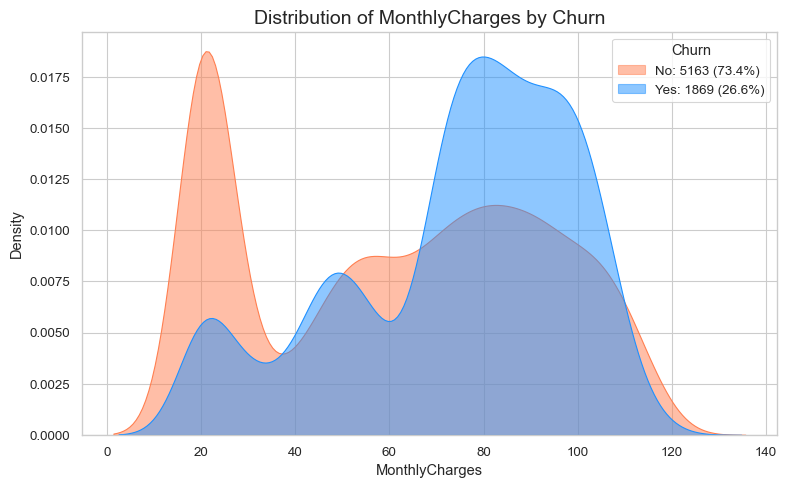

In [41]:
import matplotlib.patches as mpatches
def plot_kde_churn(df, column="MonthlyCharges", target="Churn", colors=None):
    if colors is None:
        colors = {"No": "#FF7F50", "Yes": "#1E90FF"}  # Coral y Azul

    # Filtrar NaNs y normalizar categorías
    df_plot = df[[column, target]].dropna().copy()
    df_plot[target] = df_plot[target].astype(str).str.capitalize()  # "yes" -> "Yes"

    # Calcular estadísticas para la leyenda
    total = len(df_plot)
    counts = df_plot[target].value_counts()
    
    # Crear figura
    sns.set_context("paper", font_scale=1.1)
    plt.figure(figsize=(8,5))
    ax = None
    
    for category, color in colors.items():
        if category in df_plot[target].unique():
            ax = sns.kdeplot(
                data=df_plot[df_plot[target]==category],
                x=column,
                fill=True,
                alpha=0.5,
                color=color,
                ax=ax
            )
    
    # Crear leyenda personalizada
    patches = [
        mpatches.Patch(color=color, alpha=0.5, 
                       label=f"{cat}: {counts.get(cat,0)} ({counts.get(cat,0)/total*100:.1f}%)")
        for cat, color in colors.items()
    ]
    ax.legend(handles=patches, title=target, loc='upper right')

    # Etiquetas y título
    ax.set_xlabel(column)
    ax.set_ylabel("Density")
    ax.set_title(f"Distribution of {column} by {target}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Uso
plot_kde_churn(df)

In [42]:
mean_churn_yes = df.loc[df['Churn']=='Yes','MonthlyCharges'].mean()
mean_churn_no = df.loc[df['Churn']=='No','MonthlyCharges'].mean()

if mean_churn_yes > mean_churn_no:
    print("💡 RECOMMENDATION: Customers with higher MonthlyCharges are at higher risk of churn. Consider targeted retention strategies.")

💡 RECOMMENDATION: Customers with higher MonthlyCharges are at higher risk of churn. Consider targeted retention strategies.


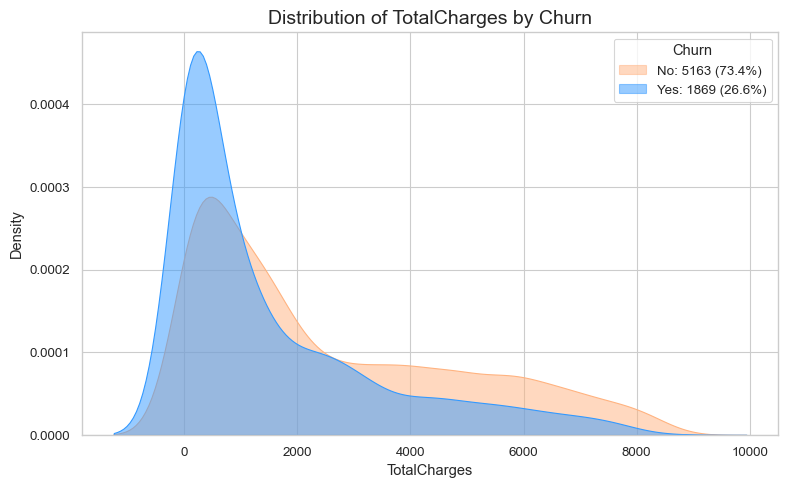

In [43]:
def plot_kde_churn(df, column="TotalCharges", target="Churn", colors=None):
    if colors is None:
        colors = {"No": "#FFB380", "Yes": "#3399FF"}  # Coral y Azul

    # Convertir columna a numérica si es necesario
    df_plot = df[[column, target]].copy()
    df_plot[column] = pd.to_numeric(df_plot[column], errors='coerce')
    df_plot = df_plot.dropna()
    df_plot[target] = df_plot[target].astype(str).str.capitalize()  # "yes" -> "Yes"

    # Calcular estadísticas para la leyenda
    total = len(df_plot)
    counts = df_plot[target].value_counts()
    
    # Crear figura
    sns.set_context("paper", font_scale=1.1)
    plt.figure(figsize=(8,5))
    ax = None
    
    for category, color in colors.items():
        if category in df_plot[target].unique():
            ax = sns.kdeplot(
                data=df_plot[df_plot[target]==category],
                x=column,
                fill=True,
                alpha=0.5,
                color=color,
                ax=ax
            )
    
    # Crear leyenda personalizada
    patches = [
        mpatches.Patch(color=color, alpha=0.5, 
                       label=f"{cat}: {counts.get(cat,0)} ({counts.get(cat,0)/total*100:.1f}%)")
        for cat, color in colors.items()
    ]
    ax.legend(handles=patches, title=target, loc='upper right')

    # Etiquetas y título
    ax.set_xlabel(column)
    ax.set_ylabel("Density")
    ax.set_title(f"Distribution of {column} by {target}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Uso
plot_kde_churn(df)

In [44]:
churn_counts = df['Churn'].value_counts()
# Asegurarse de que TotalCharges es numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Calcular medias para TotalCharges por Churn
mean_charges = df.groupby('Churn')['TotalCharges'].mean()
print("\n💡 Recommendations based on TotalCharges:")

for churn_status in ['No', 'Yes']:
    rate = mean_charges.get(churn_status, 0)
    trend = "🔴 HIGH" if churn_status == 'Yes' else "🟢 LOW"
    
    print(f"  • {churn_status}:")
    print(f"    - Average TotalCharges: {rate:.2f} ({trend})")
    print(f"    - Total customers: {churn_counts.get(churn_status, 0)} ({churn_counts.get(churn_status,0)/total*100:.1f}%)")
    print(f"    - Recommendation: {'Consider incentives or retention strategies' if churn_status=='Yes' else 'Maintain engagement and satisfaction'}")
    print()


💡 Recommendations based on TotalCharges:
  • No:
    - Average TotalCharges: 2555.34 (🟢 LOW)
    - Total customers: 5163 (81.3%)
    - Recommendation: Maintain engagement and satisfaction

  • Yes:
    - Average TotalCharges: 1531.80 (🔴 HIGH)
    - Total customers: 1869 (29.4%)
    - Recommendation: Consider incentives or retention strategies



In [45]:
fig = px.box(
    df,
    x='Churn',
    y='tenure',
    color='Churn',               # Diferenciar visualmente Churn
    notched=True,                # Añade notch para mediana
    points='all',                # Muestra los puntos individuales (outliers incluidos)
    template='plotly_white',     # Estilo moderno y limpio
    title='<b>Tenure vs Churn</b>',
    labels={'tenure':'Tenure (Months)', 'Churn':'Churn Status'}
)

# Añadir mediana y media
fig.update_traces(boxmean='sd')  # Muestra media ± desviación estándar

# Tamaño y estilo del layout
fig.update_layout(
    width=750,
    height=600,
    title_font=dict(size=22, family='Courier'),
    legend_title_text='Churn',
    yaxis=dict(gridcolor='lightgray'),
    xaxis=dict(gridcolor='lightgray')
)

fig.show()


In [46]:
# Calcular estadísticas de Tenure por Churn
tenure_stats = df.groupby('Churn')['tenure'].agg(['median', 'mean', 'count']).reset_index()

overall_median = df['tenure'].median()

print("\n🔍 TENURE ANALYSIS BY CHURN:")
for _, row in tenure_stats.iterrows():
    churn_status = row['Churn']
    median_tenure = row['median']
    mean_tenure = row['mean']
    total_customers = int(row['count'])

    trend = "🔴 HIGH RISK" if churn_status == 'Yes' else "🟢 LOW RISK"

    print(f"  • {churn_status}:")
    print(f"    - Median tenure: {median_tenure:.1f} months")
    print(f"    - Mean tenure: {mean_tenure:.1f} months")
    print(f"    - Total customers: {total_customers:,}")
    print(f"    - Trend vs overall median ({overall_median} months): {trend}")
    print()

# Recomendaciones generales
print("💡 RECOMMENDATIONS:")
print("  • Focus retention efforts on customers with short tenure in the Churn=Yes group.")
print("  • Reward long-term customers to maintain loyalty and reduce churn.")
print("  • Investigate reasons for early churn to design targeted interventions.")


🔍 TENURE ANALYSIS BY CHURN:
  • No:
    - Median tenure: 38.0 months
    - Mean tenure: 37.7 months
    - Total customers: 5,163
    - Trend vs overall median (29.0 months): 🟢 LOW RISK

  • Yes:
    - Median tenure: 10.0 months
    - Mean tenure: 18.0 months
    - Total customers: 1,869
    - Trend vs overall median (29.0 months): 🔴 HIGH RISK

💡 RECOMMENDATIONS:
  • Focus retention efforts on customers with short tenure in the Churn=Yes group.
  • Reward long-term customers to maintain loyalty and reduce churn.
  • Investigate reasons for early churn to design targeted interventions.


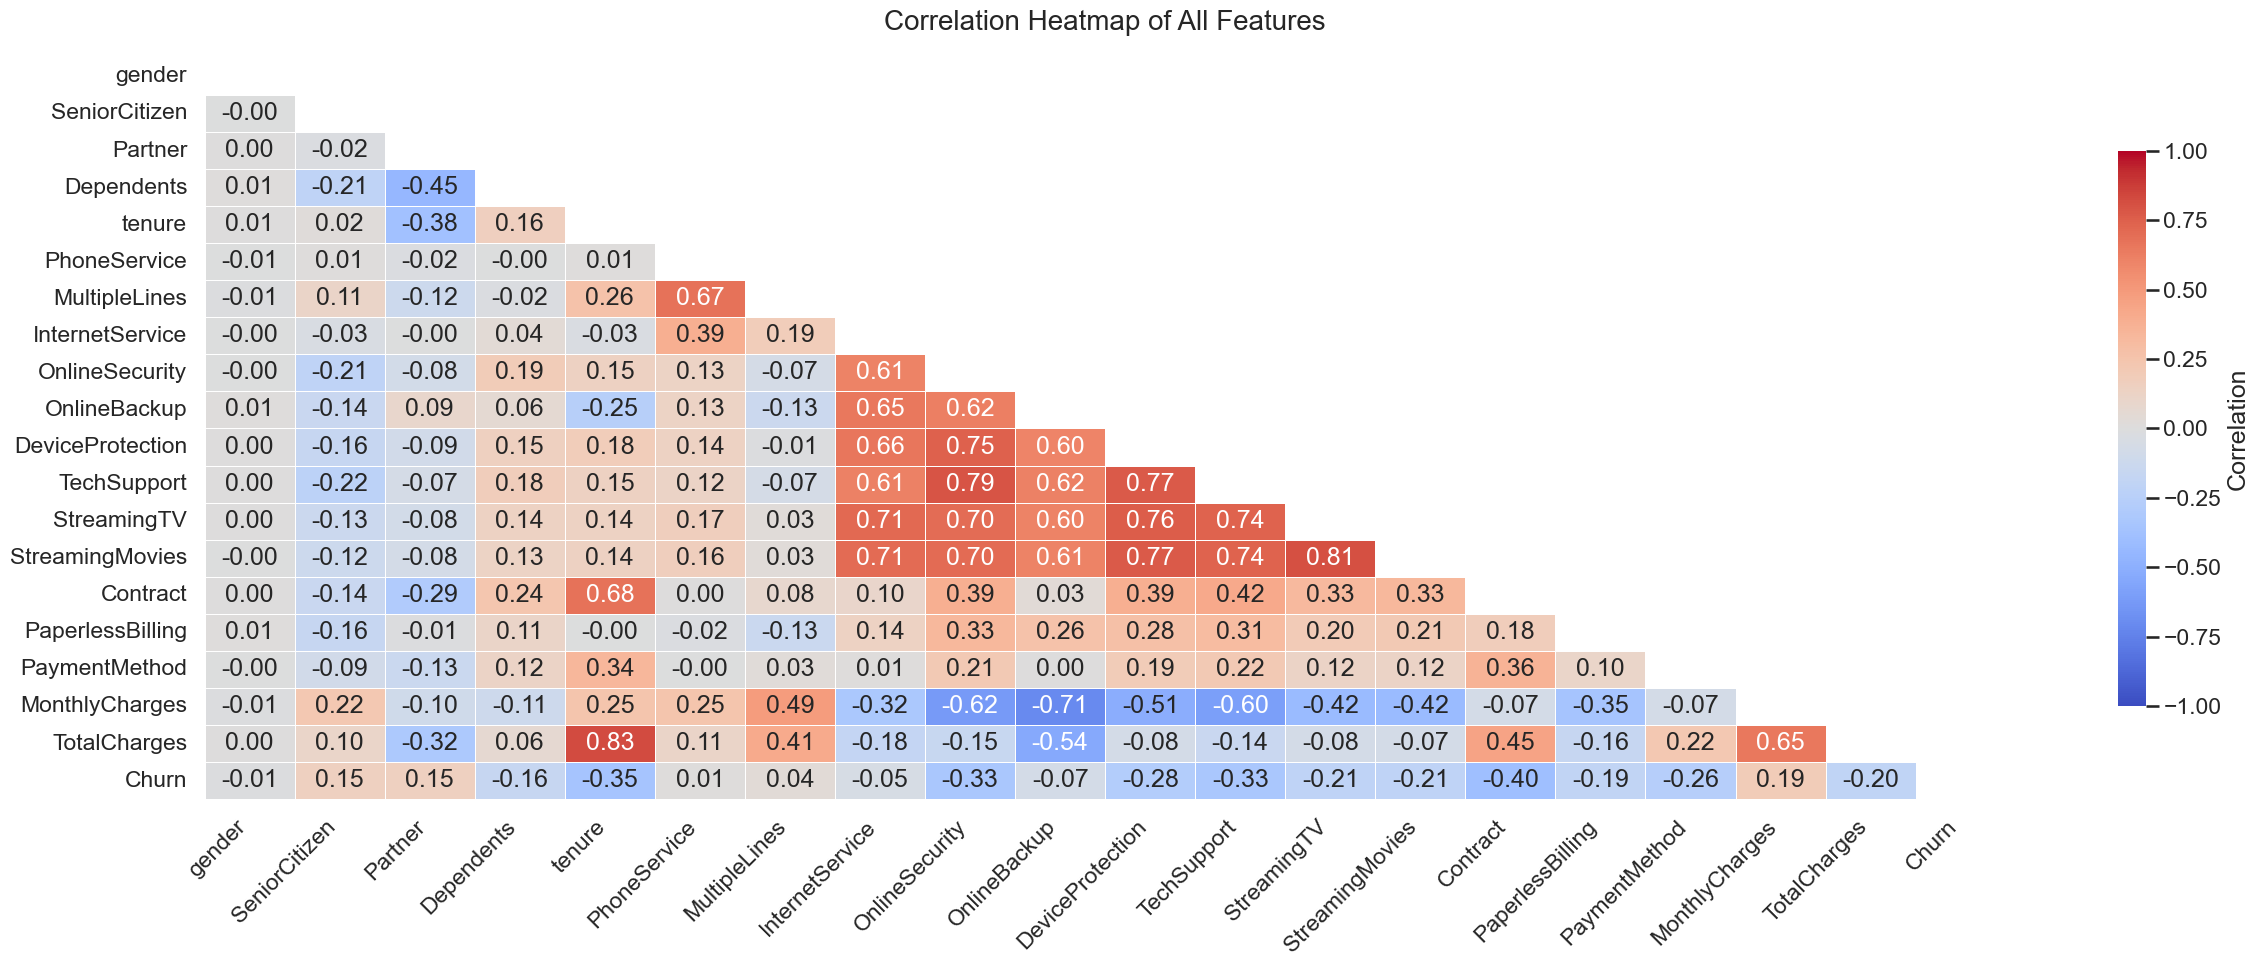

In [47]:
# Factorizar columnas categóricas para poder calcular correlaciones
df_numeric = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Matriz de correlación
corr = df_numeric.corr()

# Máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuración del plot
plt.figure(figsize=(25, 10))
sns.set_style("white")
sns.set_context("talk")  # fuente más grande y legible

# Heatmap
ax = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": 0.75, "label": "Correlation"}
)

# Etiquetas y título
ax.set_title("Correlation Heatmap of All Features", fontsize=20, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [48]:
from IPython.display import display, Markdown
def churn_summary_table(df, column, target="Churn", custom_text=None):
    """
    Genera una tabla Markdown con churn rate, riesgo y recomendaciones por categoría.
    """
    churn_rate = df.groupby(column)[target].apply(lambda x: (x=="Yes").mean()*100).round(1)
    cat_counts = df[column].value_counts()
    
    rows = []
    for cat in cat_counts.index:
        rate = churn_rate.get(cat, 0)
        risk = "🔴 HIGH" if rate > df[target].eq("Yes").mean()*100 else "🟢 LOW"
        rec = custom_text.get(cat, "Focus on retaining customers in this category.") if custom_text else "Focus on retaining customers in this category."
        rows.append((risk, cat, f"{rate:.1f}%", rec))
    
    md = f"### {column}\n\n| Risk Level | Category | Churn Rate | Recommendation |\n|---|---|---|---|\n"
    for r in rows:
        md += f"| {r[0]} | {r[1]} | {r[2]} | {r[3]} |\n"
    
    display(Markdown(md))

# Recomendaciones personalizadas por columna
custom_recs = {
    "Dependents": {
        "Yes": "Offer family-friendly retention programs.",
        "No": "Leverage their satisfaction to improve marketing."
    },
    "Partner": {
        "Yes": "Encourage existing partners to refer friends.",
        "No": "Target promotions for single customers."
    },
    "SeniorCitizen": {
        1: "Enhance accessibility and support for senior citizens.",
        0: "Maintain excellent service for non-senior customers."
    },
    "OnlineSecurity": {
        "Yes": "Promote security features as value-added service.",
        "No": "Offer affordable security packages to reduce churn.",
        "No internet service": "Upsell online services with security benefits."
    },
    "TechSupport": {
        "Yes": "Highlight tech support benefits to retain customers.",
        "No": "Offer technical support packages for high-risk customers.",
        "No internet service": "Encourage adoption of online services with support."
    },
    "PaperlessBilling": {
        "Yes": "Promote paperless billing as convenience benefit.",
        "No": "Educate about benefits of paperless billing to reduce churn."
    },
    "PhoneService": {
        "Yes": "Provide loyalty incentives for phone service users.",
        "No": "Upsell bundled phone and internet packages to retain."
    }
}

# Columnas a analizar
columns_to_analyze = ["Dependents", "Partner", "SeniorCitizen", 
                      "OnlineSecurity", "TechSupport", "PaperlessBilling", "PhoneService"]

# Generar tablas con recomendaciones
for col in columns_to_analyze:
    churn_summary_table(df, col, custom_text=custom_recs.get(col, None))

### Dependents

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | No | 31.3% | Leverage their satisfaction to improve marketing. |
| 🟢 LOW | Yes | 15.5% | Offer family-friendly retention programs. |


### Partner

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | No | 33.0% | Target promotions for single customers. |
| 🟢 LOW | Yes | 19.7% | Encourage existing partners to refer friends. |


### SeniorCitizen

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🟢 LOW | No | 23.7% | Focus on retaining customers in this category. |
| 🔴 HIGH | Yes | 41.7% | Focus on retaining customers in this category. |


### OnlineSecurity

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | No | 41.8% | Offer affordable security packages to reduce churn. |
| 🟢 LOW | Yes | 14.6% | Promote security features as value-added service. |
| 🟢 LOW | No internet service | 7.4% | Upsell online services with security benefits. |


### TechSupport

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | No | 41.6% | Offer technical support packages for high-risk customers. |
| 🟢 LOW | Yes | 15.2% | Highlight tech support benefits to retain customers. |
| 🟢 LOW | No internet service | 7.4% | Encourage adoption of online services with support. |


### PaperlessBilling

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | Yes | 33.6% | Promote paperless billing as convenience benefit. |
| 🟢 LOW | No | 16.4% | Educate about benefits of paperless billing to reduce churn. |


### PhoneService

| Risk Level | Category | Churn Rate | Recommendation |
|---|---|---|---|
| 🔴 HIGH | Yes | 26.7% | Provide loyalty incentives for phone service users. |
| 🟢 LOW | No | 25.0% | Upsell bundled phone and internet packages to retain. |
